<a href="https://colab.research.google.com/github/ramirovsjunior/aprendizagem_de_maquina/blob/main/Selecao_de_Caracteristica_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seleção de Característica para Aprendizado de Máquina

# 1.0 Feature Selection For Machine Learning
## 1.1 Introduction
Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in many cases, to improve the performance of the model.

Feature selection techniques may generally grouped into those that use the target variable (supervised) and those that do not (unsupervised). In the unsupervised feature techniques, the removal of redundant variables occur using correlation or features that have few values or low variance. Additionally, the supervised techniques can be further divided into models that automatically select features as part of fitting the model (intrinsic), those that explicitly choose features that result in the best performing model (wrapper) and those that score each input feature and allow a subset to be selected (fillter).

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables. As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection

When a mixture of input variable data types is present, different filter methods can be used. Alternately, a wrapper method such as the popular Recursive Feature Elimination (RFE) method can be used that is agnostic to the input variable type although they can be computationally expensive. Wrapper feature selection methods create many models with dierent subsets of input features and select those features that result in the best performing model according to a performance metric.

In this section, you will discover how to choose feature selection methods with numerical and categorical data.

## 1.2 Statistics for feature selection (univariate selection)
It is common to use correlation type statistical measures between input and output variables as the basis for filter feature selection. As such, the choice of statistical measures is highly dependent upon the variable data types. Common data types include numerical (such as age) and categorical (such as a workclass), although each may be further subdivided such as integer and floating point for numerical variables, and boolean, ordinal, or nominal for categorical variables. Input variables are those that are provided as input to a model. In feature selection, it is this group of variables that we wish to reduce in size. Output variables are those for which a model is intended to predict, often called the response variable.

The type of response variable typically indicates the type of predictive modeling problem being performed. For example, a numerical output variable indicates a regression predictive modeling problem, and a categorical output variable indicates a classifcation predictive modeling problem.

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.

Most of these techniques are univariate, meaning that they evaluate each predictor in isolation. In this case, the existence of correlated predictors makes it possible to select important, but redundant, predictors. The obvious consequences of this issue are that too many predictors are chosen and, as a result, collinearity problems arise.

We can consider a tree of input and output variable types and select statistical measures of relationship or correlation designed to work with these data types. The figure below summarizes this tree and some commonly suggested statistics to use at the leaves of the tree.

Numerical input, numerical output
The most common techniques are to use a correlation coefficient, such as Pearson's for a linear correlation, rank-based methods for a nonlinear correlation (Spearman) or mutual information. In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data.
Numerical input, categorical output
This is a classification predictive modeling problem with numerical input variables. This might be the most common example of a classification problem. Again, the most common techniques are correlation based: linear (ANOVA), nonlinear (Kendall) and mutual information.
Categorical input, numerical output
This is a regression predictive modeling problem with categorical input variables. This is a strange example of a regression problem (e.g. you would not encounter it often). Nevertheless, you can use the same numerical input, categorical output methods (described above), but in reverse.
Categorical input, categorical output
This is a classification predictive modeling problem with categorical input variables. The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.
## 1.3 Feature selection with any data type
So far we have looked at measures of statistical correlation that are specific to numerical and categorical data types. It is rare that we have a dataset with just a single input variable data type.

One approach to handling different input variable data types is to separately select numerical input variables and categorical input variables using appropriate metrics.

Another approach is to use a wrapper method that performs a search through different combinations or subsets of input features based on the effect they have on model quality. Simple methods might create a tree of all possible combinations of input features and navigate the graph based on the pay-off, e.g. using a best-first tree searching algorithm. Alternately, a stochastic global search algorithm can be used such as a genetic algorithm or simulated annealing. Although effective, these approaches can be computationally very expensive, specially for large training datasets and sophisticated models.

Simpler methods involve systematically adding or removing features from the model until no further improvement is seen. This includes so-called step-wise models (e.g. step-wise regression) and RFE. We will take a closer look at RFE later.

A final data type agnostic method is to score input features using a model and use a filter-based feature selection method. Many models will automatically select features or score features as part of fitting the model and these scores can be used just like the statistical methods described above. Decision tree algorithms and ensembles of decision tree algorithms provide a input variable data type agnostic method of scoring input variables, including algorithms such as:

Classifcation and Regression Trees (CART)
Random Forest
Bagged Decision Trees
Gradient Boosting
## 1.4 Common questions
### 1.4.1 How do you filter input variables?
There are two main techniques for filltering input variables. The first is to rank all input variables by their score and select the k-top input variables with the largest score. The second approach is to convert the scores into a percentage of the largest score and select all features above a minimum percentile. Both of these approaches are available in the scikit-learn library:

Select the top k variables: SelectKBest.
Select the top percentile variables: SelectPercentile.
### 1.4.2 How can I use statistics for other data types?
Consider transforming the variables in order to access different statistical methods. For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out. You can also make a numerical variable discrete to try categorical-based measures.

Some statistical measures assume properties of the variables, such as Pearson's correlation that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

###1.4.3 How do I know what features were selected?
You can apply a feature selection method as part of the modeling pipeline and the features that are selected may be hidden from you. If you want to know what features were selected by a given feature selection method, you can apply the feature selection method directly to your entire training dataset and report the column indexes of the selected features. You can then relate the column indexes to the names of your input variables to aide in interpreting your dataset.

###1.4.4 What is the best feature selection method?
This is unknowable. Just like there is no best machine learning algorithm, there is no best feature selection technique. At least not universally. Instead, you must discover what works best for your specific problem using careful systematic experimentation. Try a range of different techniques and discover what works best for your specific problem.

#2.0 Hypothesis Testing: Fundamentals
##2.1 Significance Testing
###2.1.1 Hypothesis Testing
In this section, we'll learn about hypothesis testing and statistical significance. A hypothesis is a pattern or rule about a process in the world that can be tested. We use hypothesis testing to determine if a change we made had a meaningful impact or not.

You can use hypothesis testing to help you determine:
if a new banner ad on a website caused a meaningful drop in the user engagement,
if raising the price of a product caused a meaningful drop in sales,
if a new weight loss pill helped people lose more weight.
Observing a decrease in user engagement or sales after instituting a change doesn't automatically imply that the change was the cause. Hypothesis testing allows us to calculate the probability that random chance was actually responsible for the difference in outcome. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a conclusion that's more likely to be correct.

We first set up a null hypothesis that describes the status quo. We then state an alternative hypothesis, which we used to compare with the null hypothesis to decide which describes the data better. In the end, we either need to:

reject the null hypothesis and accept the alternative hypothesis or
accept the null hypothesis and reject the alternative hypothesis.
We can frame each of the studies above as these rival pairs of hypotheses:

if a new banner ad on a website caused a meaningful drop in the user engagement:
null hypothesis: users who were exposed to the banner ad spent the same amount of time on the website than those who weren't.
alternative hypothesis: users who were exposed to the banner ad spent less time on the website than those who weren't.
if raising the price of a product caused a meaningful drop in sales:
null hypothesis: the number of purchases of the product was the same at the lower price than it was at the higher price.
alternative hypothesis: the number of purchases of the product was lower at the higher price than it was at the lower price.
if a new weight loss pill helped people lose more weight:
null hypothesis: patients who went on the weight loss pill lost no more weight than those who didn't.
alternative hypothesis: patients who went on the weight loss pill lost more weight than those who didn't.
In the rest of Section Significance Testing, we'll focus on the third scenario and use data to determine if a weight loss pill helped people lose weight.

###2.1.2 Research design
To help us determine if the weight loss pill was effective, we conducted a study where we invited 100 volunteers and split them into 2 even groups randomly:

Group A was given a placebo, or fake, pill and instructed to consume it on a daily basis.
Group B was given the actual weight loss pill and instructed to consume it on a daily basis.
Both groups were instructed to change nothing else about their diets. Group A is referred to as the control group while group B is referred to as the treatment group. This type of study is called a blind experiment since the participants didn't know which pill they were receiving. This helps us reduce the potential bias that is introduced when participants know which pill they were given. For example, participants who are aware they were given the weight loss pill may try to add healthier foods to their diet to help them lose more weight. Both groups were weighed before the study began and a month later, after the study ended.

Understanding the research design for a study is an important first step that informs the rest of your analysis. It helps us uncover potential flaws in the study that we need to keep in mind as we dive deeper. The weight loss pill study we conducted is known as an experimental study. Experimental studies usually involve bringing in participants, instructing them to perform some tasks, and observing them. A key part of running an experimental study is random assignment, which involves assigning participants in the study to random groups without revealing which group each participant is in. Before exploring and analyzing a dataset, it's important to understand how the study was conducted. Flaws in how the study was run can lead you to reach the wrong conclusions.

###2.1.3 Statistical significance
Statistics helps us determine if the difference in the weight lost between the 2 groups (A and B) is because of random chance or because of an actual difference in the outcomes. If there is a meaningful difference, we say that the results are statistically significant. We'll dive into what this means exactly over the course of this section.

Now that we're familiar with the study, let's state our null and alternative hypotheses more precisely. Our null hypothesis should describe the default position of skepticism, which is that there's no statistically significant difference between the outcomes of the 2 groups. Put another way, it should state that any difference is due to random chance. Our alternative hypothesis should state that there is in fact a statistically significant difference between the outcomes of the 2 groups.

Null hypothesis: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill.
Alternative hypothesis: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset
data = pd.read_csv("weight_loss.csv",names=["A","B"])

# weight mean for group A and B
mean_group_a = data.A.mean()
mean_group_b = data.B.mean()

# print the results
print(mean_group_a,mean_group_b)

2.82 5.34


In [ ]:
data.shape

(50, 2)

In [ ]:
data.head()

,A,B
0,3,5
1,2,4
2,3,5
3,4,5
4,3,4


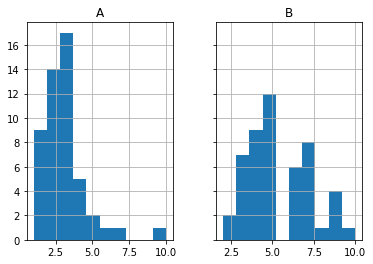

In [ ]:
data.hist(sharey=True)
plt.show()

###2.1.4 Test statistic
To decide which hypothesis more accurately describes the data, we need to frame the hypotheses more quantitatively. The first step is to decide on a test statistic, which is a numerical value that summarizes the data and we can use in statistical formulas. We use this test statistic to run a statistical test that will determine how likely the difference between the groups were due to random chance.

Since we want to know if the amount of weight lost between the groups is meaningfully different, we will use the difference in the means, also known as the mean difference, of the amount of weight lost for each group as the test statistic.

The following symbol is used to represent the sample mean in statistics:

$$
\bar{x}
$$
We will use:

$$
\bar{x}_a
$$
to denote the mean of group A and

$$
\bar{x}_b
$$
to denote the mean of group B. For the mean difference, we'll subtract the mean of group A from group B:

$$
\bar{x}_b - \bar{x}_a
$$
Now that we have decided on a test statistic, we can rewrite our hypotheses to be more precise:

Null hypothesis: $\bar{x}_b - \bar{x}_a = 0$
Alternative hypothesis: $\bar{x}_b - \bar{x}_a &gt; 0$
Note that while we've stated our hypotheses as equations, we're not simply calculating the difference and matching the result to hypothesis. We're instead using a statistical test to determine which of these statements better describes the data.

In [ ]:
mean_group_b - mean_group_a

2.52


$$
\bar{x}_b - \bar{x}_a = 2.52
$$
###2.1.5 Permutation test
Now that we have a test statistic, we need to decide on a statistical test. The purpose of a statistical test is to work out the likelihood that the result we achieved was due to random chance.

The permutation test is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the sampling distribution and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of 2.52) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, that the weight loss pill doesn't help people lose more weight, than the observed mean difference of 2.52 should be quite common in the sampling distribution. If it's instead extremely rare, then we accept the alternative hypothesis instead.

To simulate rerunning the study, we randomly reassign each data point (weight lost) to either group A or group B. We keep track of the recalculated test statistics as a separate list. By re-randomizing the groups that the weight loss values belong to, we're simulating what randomly generated groupings of these weight loss values would look like. We then use these randomly generated groupings to understand how rare the groupings in our actual data were.

Ideally, the number of times we re-randomize the groups that each data point belongs to matches the total number of possible permutations. Usually, the number of total permutations is too high for even powerful supercomputers to calculate within a reasonable time frame. While we'll use 1000 iterations for now since we'll get the results back quickly, in later we'll learn how to quantify the tradeoff we make between accuracy and speed to determine the optimal number of iterations.

Since we'll be randomizing the groups each value belongs to, we created a list named all_values that contains just the weight loss values.

In [ ]:
import numpy as np

# concatenate A and B in a vector
df = pd.concat([data.A,data.B],axis=0,ignore_index=True)

# shuffle all values
all_values= df.reindex(np.random.permutation(df.index)).values
all_values

array([ 3,  5,  5,  3,  3,  5,  5,  4,  5,  4,  7,  3,  6,  9,  5,  1,  3,
        6,  3,  2,  7,  3,  4,  1,  2,  6,  3,  3,  4,  1,  4,  3,  2,  9,
        3,  6,  3,  1,  5,  4,  4,  2,  4,  4,  2,  9,  1,  3,  3,  1,  5,
        5,  3,  9,  5,  4,  7,  1,  3, 10,  5,  2,  1,  4,  7,  4,  6,  7,
        6,  7,  7,  2,  5,  3,  2,  5,  2,  2,  4,  2,  3,  2,  7,  2,  8,
        5,  7,  1,  6,  3,  3,  2,  2,  4,  3,  3,  2,  3, 10,  3])

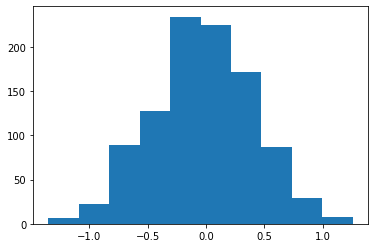

In [ ]:
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
   
plt.hist(mean_differences)
plt.show()

###2.1.6 Sampling distribution
By randomly assigning participants to group A or group B, we account for the effect of random chance. Someone in group B who just happened to lose more weight (but not because of the pills) makes the results look better than they were. By creating many permutations, we're able to see all possible configurations of this error. Creating a histogram enables us to see how likely different values of our test statistic are if we repeated our experiment many times.

The histogram we generated in the previous step using Matplotlib is a visual representation of the sampling distribution. Let's now create a dictionary that contains the values in the sampling distribution so we can benchmark our observed test statistic against it.

The keys in the dictionary should be the test statistic and the values should be their frequency:

{
    0.34943639291465356: 3,
    -0.55702280912364888: 2, 
    -0.14942528735632177: 1
    ....
}
We need to first count up how frequently each value in the list, mean_differences, occurs. As we loop over mean_differences, we need a way to check if the test statistic is already in our dictionary:

If it is, we look up the value at that key, add 1 to it, and assign the new value to the key.
If it isn't, we add the key to the dictionary and assign the value 1 to it.

In [ ]:
sampling_distribution = {}
for diff in mean_differences:
    if sampling_distribution.get(diff, False):
        sampling_distribution[diff] = sampling_distribution[diff] + 1
    else:
        sampling_distribution[diff] = 1

In [ ]:
sorted(sampling_distribution.items(), key=lambda kv: kv[1],reverse=True)[:10]

[(-0.1200000000000001, 9),
 (0.2103572862304297, 8),
 (-0.1968787515006003, 7),
 (0.33939393939393936, 7),
 (0.009634684865515553, 7),
 (-0.09339774557165814, 6),
 (-0.11079887595343241, 6),
 (0.046474358974359475, 6),
 (-0.1300682456844635, 5),
 (0.07371794871794801, 5)]

###2.1.7 P value
In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we then divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

This probability is called the p value. If this value is high, it means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role. On the other hand, a low p value implies that there's an incredibly small probability that the mean difference we observed was because of random chance.

In [ ]:
# P Value
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

In general, it's good practice to set the p value threshold before conducting the study:

if the p value is less than the threshold, we:
reject the null hypothesis that there's no difference in mean amount of weight lost by participants in both groups,
accept the alternative hypothesis that the people who consumed the weight loss pill lost more weight,
conclude that the weight loss pill does affect the amount of weight people lost.
if the p value is greater than the threshold, we:
accept the null hypothesis that there's no difference in the mean amount of weight lost by participants in both groups,
reject the alternative hypothesis that the people who consumed the weight loss pill lost more weight,
conclude that the weight loss pill doesn't seem to be effective in helping people lose more weight.
The most common p value threshold is 0.05 or 5%, which is what we'll use in this section. Although .05 is an arbitrary threshold, it means that there's only a 5% chance that the results are due to random chance, which most researchers are comfortable with.

##2.2 Chi-Squared Test
###2.2.1 Observed and expected frequencies
In this section, we'll be learning about the chi-squared test for categorical data. This test enables us to determine the statistical significance of observing a set of categorical values.

We'll be working with data on US income and demographics throughout this section.

We'll be looking at individual income in the United States. The data is from the 1994 census, and contains information on an individual's marital status, age, type of work, and more. You can download the data from the University of California, Irvine's website.

In [ ]:
import pandas as pd

# columns used 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex','capital_gain', 'capital_loss', 'hours_per_week',
           'native_country','high_income']
# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header=None,
                   names=columns)

income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
income.shape

(32561, 15)

In [ ]:
income.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64


The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.50 each.

Male	Female	Total
Observed	21790	10771	32561
Expected	16280.50	16280.50	32561

In [ ]:
print("Number of rows: %d" % (income.shape[0]))
print("observed #female: %d\nobserved #male: %d" % (income.sex.value_counts()[1], income.sex.value_counts()[0]))
print("expected #female: %.2f\nexpected #male: %.2f" % (income.shape[0]*0.5, income.shape[0]*0.5))

Number of rows: 32561
observed #female: 10771
observed #male: 21790
expected #female: 16280.50
expected #male: 16280.50


We know that something looks off, but we don't quite know how to quantify how different the observed and expected values are. We also don't have any way to determine if there's a statistically significant difference between the two groups, and if we need to investigate further.

This is where a chi-squared test can help. The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.

###2.2.2. Chi-Square Value
We can calculate , the chi-squared value, by adding up all of the squared differences between observed and expected values.

$$
\chi^2 = \sum_{i=1}^{k} \frac{(observed-expected)^2}{expected}
$$
where $k$ is the number of classes the variable under study (in this case, $k=2$, male and female).

In [ ]:
female_diff = (income.sex.value_counts()[1] - income.shape[0]* 0.5)**2/(income.shape[0]*0.5)
male_diff = (income.sex.value_counts()[0] - income.shape[0]* 0.5)**2/(income.shape[0]*0.5)
chi2_census = female_diff + male_diff
chi2_census

3728.950615767329

Now that we have a chi-squared value for our observed and expected gender counts, we need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. If you recall, we covered statistical significance and p-values in the last section. A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

Randomly generate 32561 numbers that range from 0-1.
Based on the expected probabilities, assign Male or Female to each number.
Compute the observed frequences of Male and Female.
Compute the chi-squared value and save it.
Repeat several times.
Create a histogram of all the chi-squared values.
By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value.

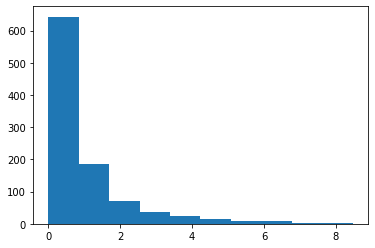

In [ ]:
from numpy.random import random
import matplotlib.pyplot as plt

chi_squared_values = []

for i in range(1000):
    sequence = random((32561,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([21790, 10771])
expected = np.array([16280.50,16280.50])
chisquare_value, pvalue = chisquare(observed, expected)

In [ ]:
chisquare_value

3728.950615767329

In [ ]:
pvalue

0.0

In [ ]:
# Cinco graus de liberdade
income.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, race_pvalue = chisquare(observed, expected)

In [ ]:
chisquare_value

1080.485936593381

In [ ]:
race_pvalue

1.2848494674873035e-232

In [32]:
cross = pd.crosstab(income["sex"], [income["high_income"]],margins=True)
cross

high_income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [33]:
pd.crosstab(income["sex"], [income["high_income"]],margins=True,normalize=True).round(3)

high_income,<=50K,>50K,All
sex,,,
Female,0.295,0.036,0.331
Male,0.465,0.205,0.669
All,0.759,0.241,1.000


In [34]:
# Valores esperados para cada 4 valores da tabela abaixo
males_over50k = .669 * .241 * 32561
males_under50k = .669 * .759 * 32561
females_over50k = .331 * .241 * 32561
females_under50k = .331 * .759 * 32561

print("Total: %d" % (males_over50k + males_under50k + females_over50k + females_under50k))
print("Females <=50k: %.2f" % females_under50k)
print("Females >50k: %.2f" % females_over50k)
print("Males <=50k: %.2f" % males_under50k)
print("Males >50k: %.2f" % males_over50k)

Total: 32561
Females <=50k: 8180.27
Females >50k: 2597.42
Males <=50k: 16533.53
Males >50k: 5249.78


In [35]:
observed = np.array([9592, 1179, 15128,	6662])
expected = np.array([8180.27, 2597.42, 16533.53, 5249.78])

chisq_value, pvalue_gender_income = chisquare(observed, expected)

In [36]:
chisq_value

1517.595316564686

In [37]:
pvalue_gender_income

0.0

In [38]:
from scipy.stats import chi2_contingency

chisq_value, pvalue_gender_race, df, expected = chi2_contingency(pd.crosstab(income["sex"], 
                                                                             [income["high_income"]]))

In [39]:
chisq_value

1517.813409134445

In [40]:
pvalue_gender_race

0.0

In [41]:
df

1

In [42]:
expected

array([[ 8177.24025675,  2593.75974325],
       [16542.75974325,  5247.24025675]])